1. Use dictionary comprehension to count the length of each word in a sentence

st =['Hello','everyone','all','the','best']

In [31]:
st = ['Hello', 'everyone', 'all', 'the', 'best']
word_l = {word: len(word) for word in st}
print(word_l)

{'Hello': 5, 'everyone': 8, 'all': 3, 'the': 3, 'best': 4}


Difference between covarriance and correlation.

What is CLT ?

CLT (Central Limit Theorem) states that when you take sufficiently large random samples from any population 
the sampling distribution of the sample mean will approximate a normal distribution.

Two main differences between set and dictionary.

1. Sets store unordered unique values while dictionaries store key value pairs with unique keys.  
2. In a set you access elements by value but in a dictionary you access elements by key.

Difference between linspace and arange with example

In [32]:
import numpy as np

arr = np.linspace(0,2,5)
print(arr)

arr = np.arange(0, 1, 0.25)
print(arr)

[0.  0.5 1.  1.5 2. ]
[0.   0.25 0.5  0.75]


what is type1 error?

In null hypothesis Type1 error means rejecting the null hypothesis.

Function to find the outline in the dataset? (lower limit and upper limit)

In [14]:
def find_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_limit or x > upper_limit]
    return lower_limit, upper_limit, outliers
    
data = [12, 15, 14, 10, 100, 23, 17, 21, 22, 18, 120, 19]
lower_limit, upper_limit, outliers = find_outliers(data)
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)
print("Outliers:", outliers)


Lower Limit: 3.5
Upper Limit: 33.5
Outliers: [100, 120]


Statistical tests to check if data is normally distributed (Names of the tests)

1.Shapiro Wilk Test
2.

List the assumptions of linear regression.

1. It assumes that the data is in linear form.
2. One error should not predict another. Especially important in time series data.
3. Each predictor should bring unique value useful information to the model, if two variables have the same value it confuses the model.

what is entrophy and information gain (formula)

Entropy is a measure of disorder in a dataset. It quantifies the unpredictability of a random variable.

Information Gain is reduction in entropy after a dataset is split based on certain feature. It measures how much information feature provides about the class label.

Exploratory data analysis and build RF using CV?

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('loan_data_set.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


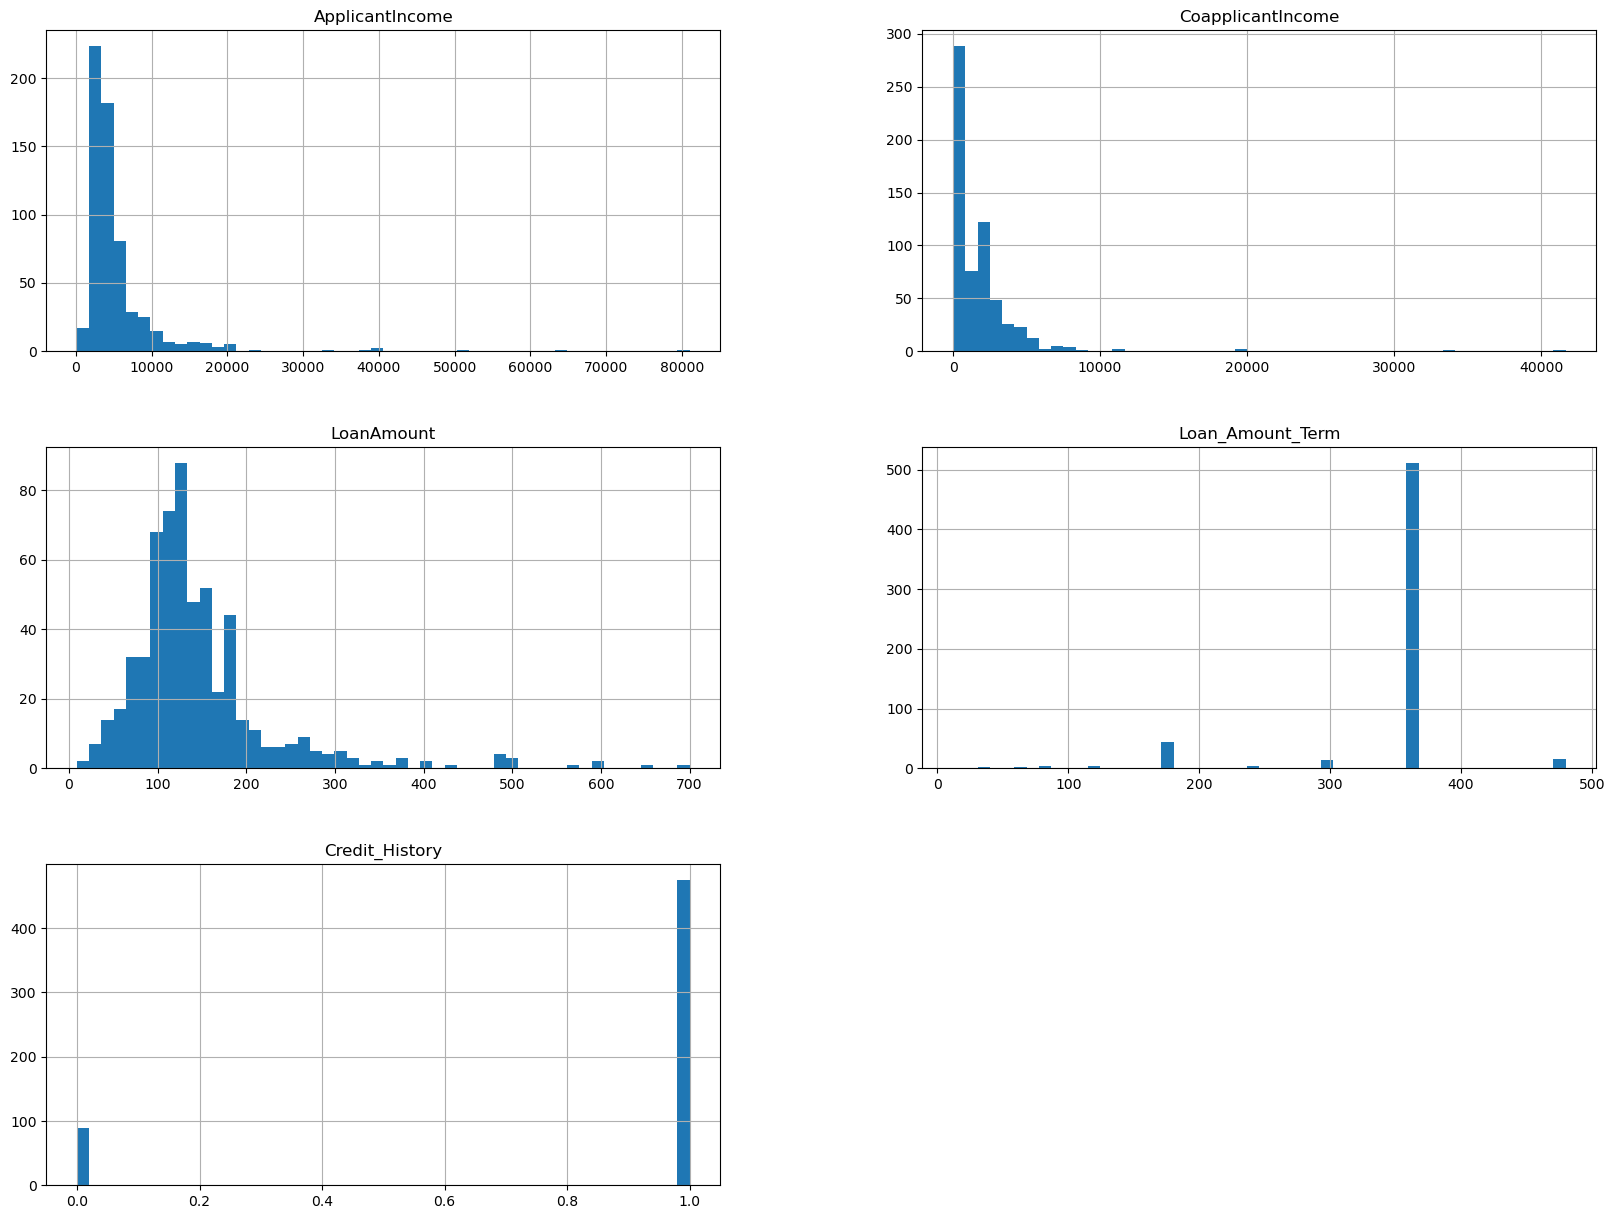

In [21]:
df.hist(bins=50, figsize=(20, 15))
plt.show()